In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys 
path="../"
sys.path.append(path)
import main as ST

path="../../"
sys.path.append(path)
from custom_tools import plot_one_pulse, get_mids_from_edges, get_T_in_log10_Kelvin

phase_mids=get_mids_from_edges(ST.data.phases)
channel_mids=get_mids_from_edges(ST.NICER.channel_edges)

def make_bg_array(bg_vector, phases):
    n = len(phases)-1
    bg_array = np.zeros((len(bg_vector), n))
    for phase in range(n):
        bg_array[:,phase] = bg_vector/n
    return bg_array




/=============================================\
| X-PSI: X-ray Pulse Simulation and Inference |
|---------------------------------------------|
|                Version: 2.0.0               |
|---------------------------------------------|
|      https://xpsi-group.github.io/xpsi      |
\=============================================/

Imported GetDist version: 1.4
Imported nestcheck version: 0.2.1
E: failed to import some OS environment variables, using defaults.
machine:  local
num_energies:  128
num_leaves:  128
sqrt_num_cells:  128
integrator: azimuthal_invariance
interpolator: split
Rank reporting: 0
Setting channels for event data...
Channels set.
Setting channels for loaded instrument response (sub)matrix...
Channels set.
No parameters supplied... empty subspace created.
Creating parameter:
    > Named "frequency" with fixed value 4.010e+02.
    > Spin frequency [Hz].
Creating parameter:
    > Named "mass" with bounds [1.000e+00, 3.000e+00].
    > Gravitational mass [solar masses

# likelihood original vector

(<Figure size 500x300 with 2 Axes>,
 <AxesSubplot: xlabel='Phase', ylabel='Energy (keV)'>)

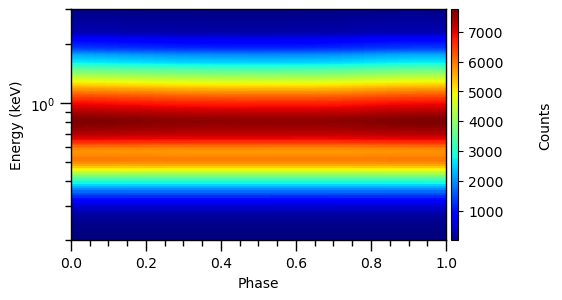

In [2]:
counts_true = ST.signal.expected_counts
plot_one_pulse(counts_true, ST.data.phases, ST.NICER.channel_edges)

(<Figure size 500x300 with 2 Axes>,
 <AxesSubplot: xlabel='Phase', ylabel='Energy (keV)'>)

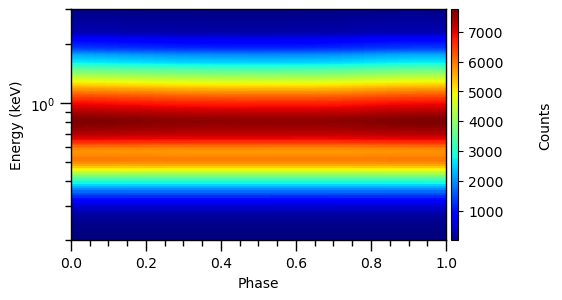

In [3]:
plot_one_pulse(ST.data.counts, ST.data.phases, ST.NICER.channel_edges)

summed difference:  0.002181848468804759


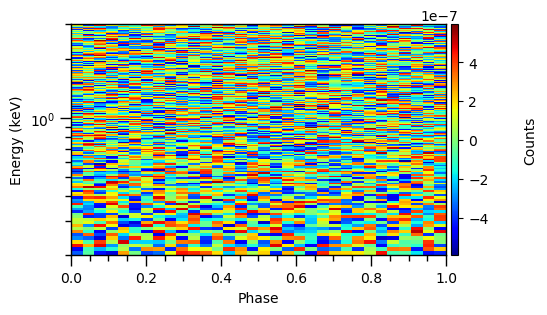

In [4]:
diff_true = counts_true-ST.data.counts


plot_one_pulse(diff_true, ST.data.phases, ST.NICER.channel_edges)

print('summed difference: ', np.sum(abs(diff_true)))

norm_true = diff_true/np.sqrt(ST.data.counts)
plot_one_pulse(norm_true, ST.data.phases, ST.NICER.channel_edges)

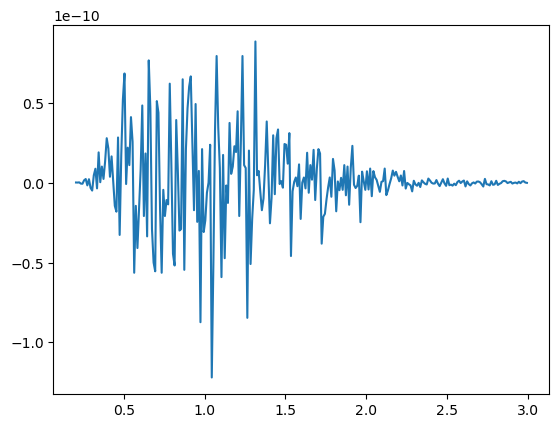

In [5]:
fig, ax = plt.subplots()
summed_diff = np.sum((diff_true),axis=1)
ax.plot(channel_mids, summed_diff, label='true')

[]

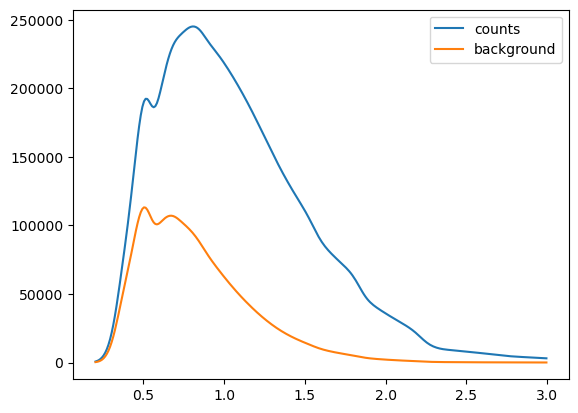

In [6]:
fig, ax = plt.subplots()
summed_counts_o = np.sum(ST.signal.expected_counts, axis =1) 
true_background = ST.signal.background_signal
ax.plot(channel_mids,summed_counts_o, label='counts')
ax.plot(channel_mids,true_background, label='background')
ax.legend()
ax.plot()

In [7]:
ST.signal.background_signal

array([3.06338913e+02, 5.10001989e+02, 8.33897725e+02, 1.33092610e+03,
       2.06128712e+03, 3.08843372e+03, 4.47757861e+03, 6.29620495e+03,
       8.61223975e+03, 1.14855715e+04, 1.49532746e+04, 1.90140609e+04,
       2.36189495e+04, 2.86724532e+04, 3.40448677e+04, 3.95936894e+04,
       4.51907440e+04, 5.07495112e+04, 5.62443511e+04, 6.17121002e+04,
       6.72305843e+04, 7.28779964e+04, 7.86876636e+04, 8.46160932e+04,
       9.05356191e+04, 9.62495996e+04, 1.01518386e+05, 1.06084287e+05,
       1.09693719e+05, 1.12124721e+05, 1.13229399e+05, 1.12989000e+05,
       1.11561347e+05, 1.09290227e+05, 1.06654429e+05, 1.04164045e+05,
       1.02238424e+05, 1.01115352e+05, 1.00825361e+05, 1.01231350e+05,
       1.02106364e+05, 1.03211425e+05, 1.04347356e+05, 1.05373695e+05,
       1.06203394e+05, 1.06787639e+05, 1.07101859e+05, 1.07138313e+05,
       1.06903099e+05, 1.06419001e+05, 1.05723899e+05, 1.04867255e+05,
       1.03902415e+05, 1.02876441e+05, 1.01821364e+05, 1.00750513e+05,
      

marginalised_bg = make_bg_array(ST.signal.background_signal, ST.data.phases)/ST.data.exposure_time
summed_loglike, loglike, expected_counts1, star1 = ST.signal.poisson_likelihood_given_background(marginalised_bg)
print('summed_loglike: ',summed_loglike)

background_count_rate = np.loadtxt('J1808_synthetic_diskbb_background.txt')

fig, ax = plt.subplots()
ax.plot(ST.signal.background_signal-np.sum(background_count_rate, axis=1)*ST.data.exposure_time)
ax.set_ylabel('difference in counts')
ax.set_xlabel('channels')
ax.set_title('difference in marginalised and model backgrounds')
# difference in model background and marginalised background

summed_loglike, loglike, expected_counts2, star2 = ST.signal.poisson_likelihood_given_background(background_count_rate)
print('summed_loglike: ',summed_loglike)

plot_one_pulse(star1-star2,ST.data.phases, ST.NICER.channel_edges)

plot_one_pulse(expected_counts1-expected_counts2,ST.data.phases, ST.NICER.channel_edges)

# marginalised background with data/original vector
plot_one_pulse(ST.data.counts-expected_counts1,ST.data.phases, ST.NICER.channel_edges)
print(np.sum((ST.data.counts-expected_counts1)))

# actual background from model with data/original vector
plot_one_pulse(ST.data.counts-expected_counts2,ST.data.phases, ST.NICER.channel_edges)
print(np.sum((ST.data.counts-expected_counts2)))

# Maximum likelihood 192 lp job

-11768.410883253657
summed difference:  1734.3165733558333


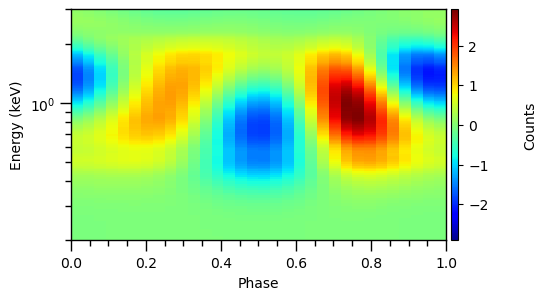

In [8]:
# P_MaxL_192 = [0.166089488067012603E+01,
# 0.880002192119270887E+01,
# 0.346449329423984453E+01,
# 0.146451450087112731E-01,
# -0.824004344790990606E-02,
# 0.113710559990825955E+01,
# 0.334581240206683672E+00,
# 0.147006720245396834E-02,
# 0.738928142100897958E+02,
# 0.119092736886722195E+01,
# 0.670045739653590822E+01,
# 0.121213084628677747E+01]

# P_MaxL_NP_192 = [0.159541871493433973E+01,
# 0.103217607341850268E+02,
# 0.348596939961232444E+01,
# 0.546166856071860551E+00,
# -0.528761454159420996E-02,
# 0.105021979369667684E+01,
# 0.313327751326617054E+00,
# 0.129295039715317858E-02,
# 0.415074685360910678E+02,
# 0.153428372501099131E+01,
# 0.666247831762742670E+01,
# 0.100173397883003434E+01]

# P_sfac10_np = [0.161918804730604338E+01,
# 0.113568614792697762E+02,
# 0.350052587043986385E+01,
# 0.164820916286745167E+00,
# 0.481332648124821461E-02,
# 0.683364603964798034E+00,
# 0.301653772232013562E+00,
# 0.128105478746190623E-02,
# 0.142029308561448403E+03,
# 0.823422731908273531E+00,
# 0.669101698459687988E+01,
# 0.124634548503898590E+01]

# P_no_bg_no_sp = [0.179574651988271583E+01,
# 0.116404571293141483E+02,
# 0.343953848316392152E+01,
# 0.113148997662499945E+00,
# -0.365438177746274517E-02,
# 0.720120042748522482E+00,
# 0.285291972400469052E+00,
# 0.131330143641136365E-02,
# 0.696323599549771899E+02,
# 0.102854131958262673E+01,
# 0.667632969432271040E+01,
# 0.139598328281685236E+01]

# given_bg = [0.149088620131332639E+01,
# 0.113390970016051522E+02,
# 0.344128175202921716E+01,
# 0.493895463200423268E+00,
# -0.165551915786074644E-02,
# 0.841750683338661432E+00,
# 0.258081757072923357E+00,
# 0.128010657536884679E-02,
# 0.118049283465624043E+03,
# 0.962430056410098267E+00,
# 0.668200333438867844E+01,
# 0.116822614082632126E+01]

# neg_bg = [0.156637091551711283E+01,
# 0.135864817924577999E+02,
# 0.353258771304456864E+01,
# 0.819535299977078635E+00,
# 0.142687075296127341E-02,
# 0.122827240539073324E+01,
# 0.254427160379538386E+00,
# 0.118643703626468248E-02,
# 0.952012967417232403E+02,
# 0.101711395191667187E+01,
# 0.664983572041771698E+01,
# 0.117348459197872512E+01]

# sf_1001 = [0.146494932273617184E+01,
# 0.113387172826378624E+02,
# 0.341237814916391402E+01,
# 0.445464253925697828E+00,
# -0.186773711931595421E-02,
# 0.788979997363377650E+00,
# 0.278849439595740767E+00,
# 0.123345358462990137E-02,
# 0.820751288286646172E+02,
# 0.102198294747937268E+01,
# 0.667886172404993150E+01,
# 0.116996411792782529E+01]

# p_sf_15 = [0.156964200901814666E+01,
# 0.114300719949050205E+02,
# 0.346738610881082243E+01,
# 0.485926406533522204E+00,
# -0.207955732517059455E-02,
# 0.831050224535188509E+00,
# 0.277681384672915199E+00,
# 0.127698304209352700E-02,
# 0.151160186519393136E+03,
# 0.982355267727833881E+00,
# 0.668591098568636610E+01,
# 0.121828234562836957E+01]

p_sf_100005 = [0.154211630331227534E+01,
0.111857905836968143E+02,
0.344641878666071744E+01,
0.423626011872219210E+00,
-0.223621742226470799E-02,
0.821134535597047632E+00,
0.264752018012472168E+00,
0.129235088076620763E-02,
0.909213969593975548E+02,
0.985748456304628595E+00,
0.668819712969091729E+01,
0.117030404173645697E+01]


print(ST.likelihood(p_sf_100005, reinitialise=True))

counts_maxl = ST.signal.expected_counts
diff_maxl = counts_maxl-ST.data.counts
plot_one_pulse(diff_maxl, ST.data.phases, ST.NICER.channel_edges)

print('summed difference: ',np.sum((diff_maxl)))

In [9]:
np.sum(diff_maxl)

1734.3165733558333

(<Figure size 500x300 with 2 Axes>,
 <AxesSubplot: xlabel='Phase', ylabel='Energy (keV)'>)

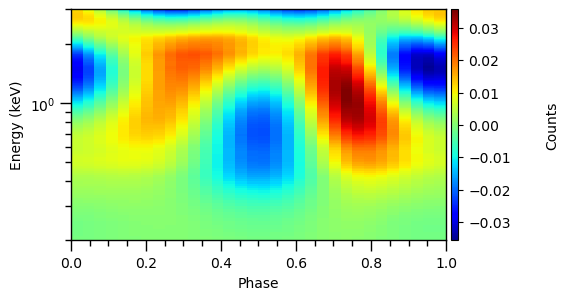

In [10]:
norm_maxl = diff_maxl/np.sqrt(ST.data.counts)
plot_one_pulse(norm_maxl, ST.data.phases, ST.NICER.channel_edges)
# residual between maxl and data normalised over data counts

[]

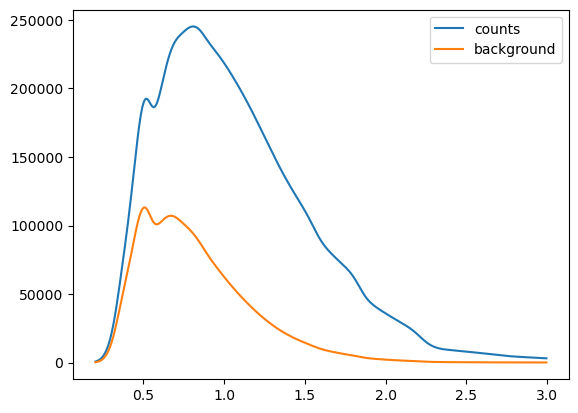

In [11]:
fig, ax = plt.subplots()
summed_counts_maxl = np.sum(ST.signal.expected_counts, axis=1) 
lp192_background = ST.signal.background_signal
ax.plot(channel_mids,summed_counts_maxl, label='counts')
ax.plot(channel_mids,lp192_background, label='background')
ax.legend()
ax.plot()

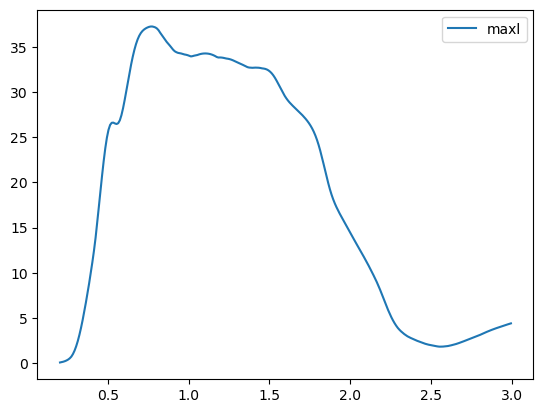

In [12]:
fig,ax = plt.subplots()
ax.plot(channel_mids,np.sum(abs(diff_maxl),axis=1), label='maxl')
ax.legend()

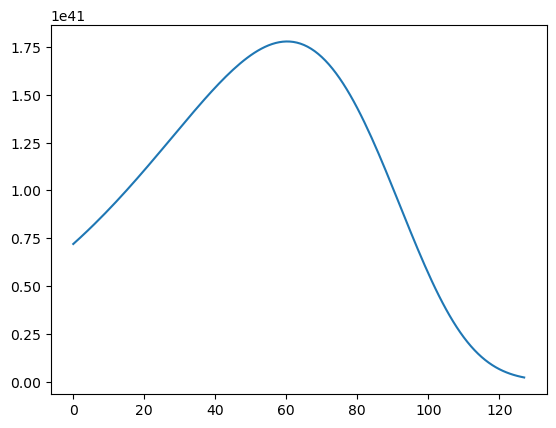

In [13]:
plt.plot(np.sum(ST.photosphere.signal[0][0],axis=1))

(<Figure size 500x300 with 2 Axes>,
 <AxesSubplot: xlabel='Phase', ylabel='Energy (keV)'>)

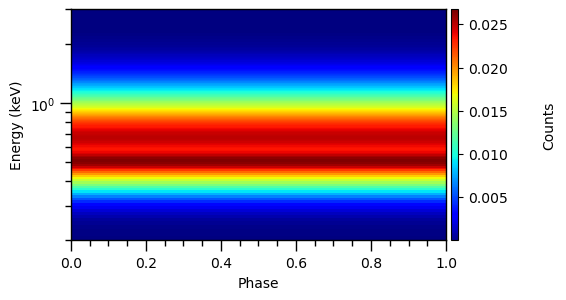

In [14]:
marginalised_bg = make_bg_array(ST.signal.background_signal, ST.data.phases)/ST.data.exposure_time
plot_one_pulse(marginalised_bg, phase_mids, channel_mids)

In [15]:
summed_loglike, loglike, expected_counts3, star = ST.signal.poisson_likelihood_given_background(marginalised_bg)
print('summed_loglike: ',summed_loglike)

AttributeError: 'CustomSignal' object has no attribute 'poisson_likelihood_given_background'

In [ ]:
plot_one_pulse(ST.data.counts-expected_counts3,ST.data.phases, ST.NICER.channel_edges)
print(np.sum(ST.data.counts-expected_counts3))

# compare original vector vs maxL vector

In [ ]:
fig, ax = plt.subplots()
ax.plot(true_background, label='true_background')
ax.plot(lp192_background, label='lp192_background')

ax.legend()
ax.plot()

In [ ]:
diff_true_maxl = counts_maxl-counts_true
plot_one_pulse(diff_true_maxl, ST.data.phases, ST.NICER.channel_edges)

# residual between counts original vector and maxL vector.

In [ ]:
norm_true_maxl = diff_true_maxl/np.sqrt(ST.data.counts)
plot_one_pulse(norm_true_maxl, ST.data.phases, ST.NICER.channel_edges)

# residual between counts original vector and maxL vector but normalised over counts

In [ ]:
fig,ax = plt.subplots()
ax.plot(channel_mids,np.sum(abs(diff_true),axis=1), label='true')
ax.plot(channel_mids,np.sum(abs(diff_maxl),axis=1), label='maxl')
ax.legend()

# phase sum of difference between data and true vector/max L vector

In [ ]:
fig,ax = plt.subplots()
ax.plot(channel_mids,np.sum(diff_true,axis=1), label='true')
ax.plot(channel_mids,np.sum(diff_maxl,axis=1), label='maxl')
ax.legend()

# phase sum of difference between data and true/maxl counts, but I let the differences cancel eachother out

In [ ]:
fig, ax = plt.subplots()
diff_true_maxl_summed = np.sum(abs(diff_true_maxl),axis=1)
ax.plot(channel_mids, diff_true_maxl_summed)
# print(diff_true_maxl_summed)

# difference between original vector and max L vector summed

# Maximum likelihood 1000 lp job

P_MaxL_1000 = [0.143487922741846097E+01,
0.105670546531530594E+02,
0.359702712157563642E+01,
0.567626751460999612E+00,
-0.962955296681333728E-03,
0.947700302807278794E+00,
0.333738393572487135E+00,
0.120907353807114988E-02,
0.541298122468860612E+02,
0.134618148088802281E+01,
0.665965052985182204E+01,
0.896414323034762095E+00]

ST.likelihood(P_MaxL_1000, reinitialise=True)

counts_maxl = ST.signal.expected_counts
diff_maxl = counts_maxl-ST.data.counts
plot_one_pulse(diff_maxl, ST.data.phases, ST.NICER.channel_edges)

print('summed difference: ',np.sum((diff_maxl)**2))

norm_maxl = diff_maxl/np.sqrt(ST.data.counts)
plot_one_pulse(norm_maxl, ST.data.phases, ST.NICER.channel_edges)

phase_mids=get_mids_from_edges(ST.data.phases)
channel_mids=get_mids_from_edges(ST.NICER.channel_edges)

fig, ax = plt.subplots()
ax.plot(phase_mids,np.sum(abs(diff_true),axis=0), label='true')
ax.plot(phase_mids,np.sum(abs(diff_maxl),axis=0), label='maxl')
ax.legend()

diff_true_maxl = counts_maxl-counts_true
plot_one_pulse(diff_true_maxl, ST.data.phases, ST.NICER.channel_edges)

norm_true_maxl = diff_true_maxl/np.sqrt(ST.data.counts)
plot_one_pulse(norm_true_maxl, ST.data.phases, ST.NICER.channel_edges)

fig, ax = plt.subplots()
ax.plot(phase_mids,np.sum(diff_true_maxl,axis=0))

# Trying to understand if there is a pattern in the residual

def average_1D(array):
    length = len(array)
    half_length = int(length/2)
    array_averaged = np.empty(half_length)
    for i in range(half_length):
        array_averaged[i] = np.mean((array[2*i],array[2*i+1]))
    return array_averaged

def average_1D_n_times(array, n_times):
    for i in range(n_times):
        array = average_1D(array)
    return array

def average_columns(data):
    averaged_data = np.zeros((int(data.shape[0]/2), data.shape[1]))
    for i in range(data.shape[1]):
        column_averaged = average_1D(data[:,i])
        averaged_data[:,i]= column_averaged
    return averaged_data
 
def average_rows(data):
    averaged_data = np.zeros((data.shape[0], int(data.shape[1]/2)))
    for i in range(data.shape[0]):
        row_averaged = average_1D(data[i,:])
        averaged_data[i,:]= row_averaged
    return averaged_data

def average_data(data, n_times_columns=0, n_times_rows=0):
    for i in range(n_times_columns):
        data = average_columns(data)
    
    for j in range(n_times_rows):
        data = average_rows(data)
    
    return data


column_average_n_times = 5
row_average_n_times = 3
averaged_data = average_data(diff_true, column_average_n_times, row_average_n_times)
averaged_phases = average_1D_n_times(phase_mids, row_average_n_times)
averaged_channels = average_1D_n_times(channel_mids, column_average_n_times)
plot_one_pulse(averaged_data, averaged_phases, averaged_channels)